In [3]:
import pandas as pd
import numpy as np

    Loading DATA

In [5]:
df = pd.read_csv('alldata_1_for_kaggle.csv',encoding="latin1")

In [6]:
df.head()

,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


EDA


In [7]:
df = df.drop('Unnamed: 0',axis=1)
df = df.rename({'0':'Cancer','a':'Research paper text'},axis=1)
df.head()

,Cancer,Research paper text
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


In [8]:
cancer_types = df['Cancer'].value_counts()

Checking for dispernancy in data

In [9]:
#checking for NULL values
df.isnull().sum()

Cancer                 0
Research paper text    0
dtype: int64

In [10]:
df.isna().sum()

Cancer                 0
Research paper text    0
dtype: int64

Attributes

In [ ]:
df.info()

In [29]:
df.describe()

,Cancer,Research paper text
count,7570,7570
unique,3,988
top,Thyroid_Cancer,"[novel, coronavirus, found, cause, highly, con..."
freq,2810,20


Plotting graph

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

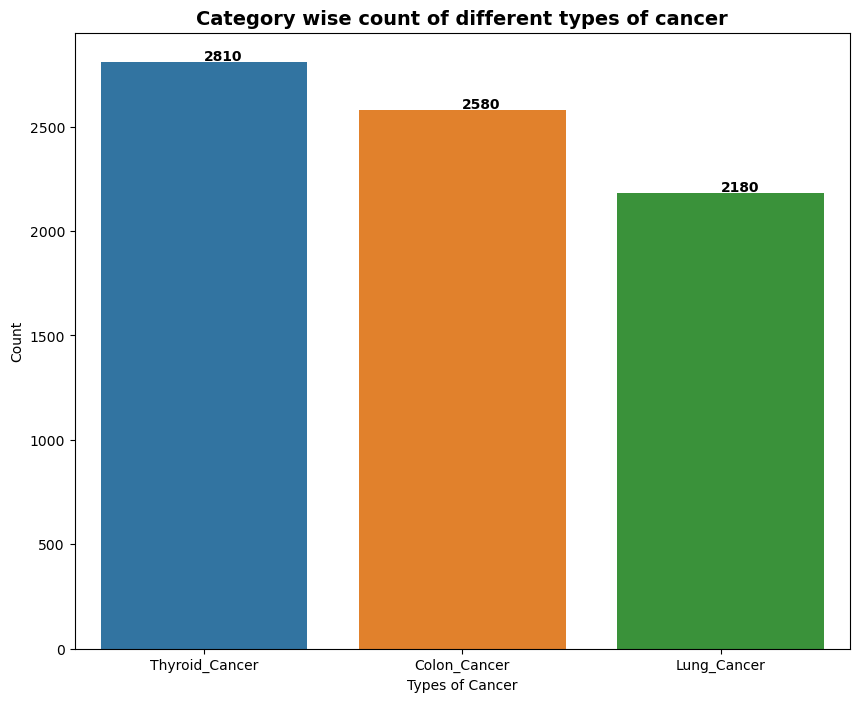

In [31]:
#plotting bar-plot of count.
plt.figure(figsize=(10,8))
plot = sns.barplot(x=cancer_types.index,y=cancer_types.values)
plt.xlabel("Types of Cancer")
plt.ylabel("Count")
plt.title("Category wise count of different types of cancer",
          fontweight='bold',
          fontsize='14')
for i,v in enumerate(cancer_types.values):
    plot.text(i,v+10,str(v),fontweight='bold')
plt.show()

# Data preprocessing

In [32]:
import nltk
from nltk.corpus import stopwords         # to get a list of stopwords
from nltk.tokenize import word_tokenize   # for tokenization of words
from nltk.stem import WordNetLemmatizer   # to find root words
from string import punctuation 
import string

In [36]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/smritidoneria/nltk_data...


True

Cleaning the 'Research paper text' string

In [37]:
def remove_spaces(data):
    if isinstance(data, str):
        clean_text = data.replace("\\n", " ").replace("\t", " ").replace("\\", " ")
        return clean_text
    elif isinstance(data, list):
        # If data is a list, join it into a single string before processing
        data = " ".join(data)
        clean_text = data.replace("\\n", " ").replace("\t", " ").replace("\\", " ")
        return clean_text
    else:
        raise TypeError("Data should be a string or a list of strings")

# Defining the function for removing stopwords
stopword = stopwords.words("english")  # List of stopwords

def clean_text(data):
    # Ensure data is a string
    if isinstance(data, list):
        data = " ".join(data)
        
    token = word_tokenize(data)
    clean_tokens = [i.lower() for i in token if (i not in string.punctuation) 
                    and (i.lower() not in stopword) and (i.isalpha()) and (len(i) > 2)]
    return clean_tokens

# Defining the function for getting root words (lemmatization)
def lemmatization(data):
    if isinstance(data, list):
        data = " ".join(data)
        
    lem = WordNetLemmatizer()
    lst1 = []
    for i in data.split():
        lem_words = lem.lemmatize(i)
        lst1.append(lem_words)
    return " ".join(lst1)

In [38]:
df['Research paper text'] = df['Research paper text'].apply(remove_spaces)
df['Research paper text'] = df['Research paper text'].apply(clean_text)
df['Research paper text'] = df['Research paper text'].apply(lemmatization)

In [39]:
df.head()

,Cancer,Research paper text
0,Thyroid_Cancer,thyroid surgery child single institution osama...
1,Thyroid_Cancer,adopted strategy used prior year based four ex...
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis muta...
3,Thyroid_Cancer,solitary plasmacytoma skull uncommon clinical ...
4,Thyroid_Cancer,study aimed investigate serum matrix metallopr...


In [42]:
# creating a wordcloud
!pip install wordcloud


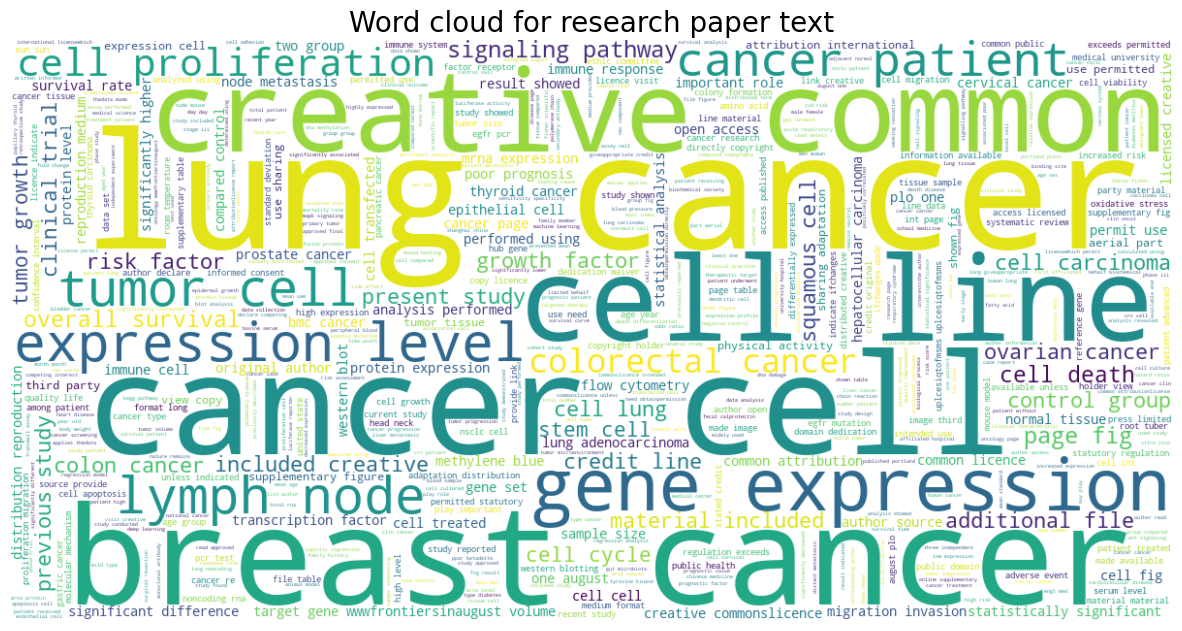

In [43]:
from wordcloud import WordCloud
data = df['Research paper text']
data_string = ' '.join(data)
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for research paper text',fontsize = 20)
plt.show()

Label encoding types of cancer

In [44]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Cancer'] = label_encoder.fit_transform(df['Cancer'])

In [45]:
df['Cancer'].unique()

array([2, 0, 1])

# Vectorization

In [46]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

In [47]:
#splitting data
X=df["Research paper text"]
y=df["Cancer"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)

In [48]:
tfidf=TfidfVectorizer(max_df=0.95,max_features=1000,min_df = 10, stop_words="english",lowercase=True)
X_train = tfidf.fit_transform(X_train)
X_test=tfidf.transform(X_test)

In [49]:
X_train

<5677x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1627393 stored elements in Compressed Sparse Row format>

In [50]:
y_train

6943    1
3952    1
7327    0
4330    0
1449    0
       ..
6840    1
7057    2
5291    1
503     0
278     2
Name: Cancer, Length: 5677, dtype: int64

In [51]:
X_test

<1893x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 541225 stored elements in Compressed Sparse Row format>

In [52]:
y_test

2099    1
7252    2
7049    2
7405    0
3422    0
       ..
5782    2
2276    1
3135    2
7425    0
1636    2
Name: Cancer, Length: 1893, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier

In [54]:
accuracy = {'TF-IDF':[]}

# Linear Regression
regressor_LL_tf = LinearRegression()
regressor_LL_tf.fit(X_train, y_train)
y_predict_LL_tf = regressor_LL_tf.predict(X_test)
a=(regressor_LL_tf.score(X_test, y_test))
accuracy['TF-IDF'].append(a)

# Logistic Regression
regressor_LR_tf = LogisticRegression(C=1.0,penalty='l2',solver='newton-cg')
regressor_LR_tf.fit(X_train, y_train)
y_predict_LR_tf = regressor_LR_tf.predict(X_test)
a=(regressor_LR_tf.score(X_test, y_test))
accuracy['TF-IDF'].append(a)

# Decision Tree
model_DT_tf = DecisionTreeClassifier(criterion = 'gini', max_depth=2) 
model_DT_tf.fit(X_train, y_train)
y_predict_DT_tf = model_DT_tf.predict(X_test)
a=(model_DT_tf.score(X_test,y_test))
accuracy['TF-IDF'].append(a)

# Random Forest
model_RF_tf = RandomForestClassifier(n_estimators= 100, max_features = 'log2')
model_RF_tf.fit(X_train, y_train)
y_predict_RF_tf = model_RF_tf.predict(X_test)
a=(model_RF_tf.score(X_test,y_test))
accuracy['TF-IDF'].append(a)

# K-Neighbors Classifier
model_KN_tf = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 5, weights= 'distance') 
model_KN_tf.fit(X_train, y_train)
y_predict_KN_tf = model_KN_tf.predict(X_test)
a=(model_KN_tf.score(X_test,y_test))
accuracy['TF-IDF'].append(a)

# Evaluation
model = ['Linear','Logistic','DT','RF','KN']
data = {'model':model,'accuracy':accuracy['TF-IDF']}
compare_models = pd.DataFrame(data)

In [55]:
compare_models

,model,accuracy
0,Linear,0.970255
1,Logistic,0.938193
2,DT,0.745906
3,RF,0.995246
4,KN,0.288431


In [56]:
compare_models["accuracy"].tolist()

[0.9702552153381616,
 0.9381933438985737,
 0.745905969360803,
 0.9952456418383518,
 0.2884310618066561]

Plotting accuracy

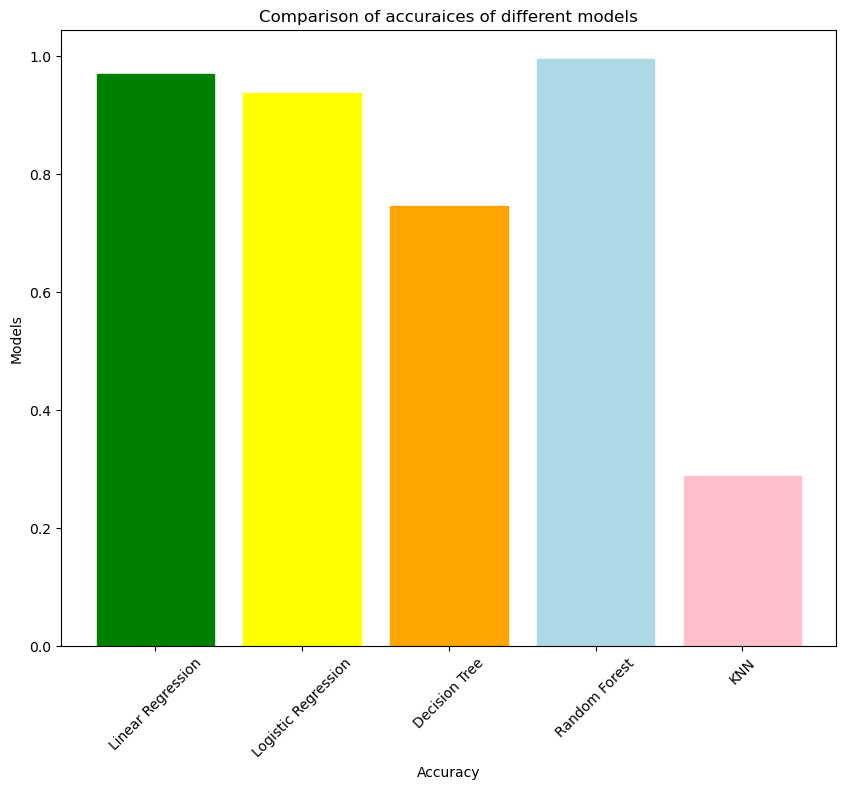

In [57]:
model = ['Linear Regression','Logistic Regression','Decision Tree','Random Forest','KNN']
acc = compare_models["accuracy"].tolist()
plt.figure(figsize=(10,8))
graph = plt.bar(model,acc)
plt.xlabel('Accuracy')
plt.ylabel('Models') 
plt.xticks(rotation=45)
plt.title("Comparison of accuraices of different models")
graph[0].set_color('green')
graph[1].set_color('yellow')
graph[2].set_color('orange')
graph[3].set_color('lightblue')
graph[4].set_color('pink')